In [1]:
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
filenames = [r"C:\Users\bhara\Downloads\fhvhv_tripdata_2023-12.parquet",r"C:\Users\bhara\Downloads\fhvhv_tripdata_2023-11.parquet",r"C:\Users\bhara\Downloads\fhvhv_tripdata_2023-10.parquet"]

# Initialize an empty list to store DataFrames
dfs = []

# Specify the number of rows to read from each file
num_rows_to_read = 600000

for file in filenames:
    # Open the Parquet file
    parquet_file = pq.ParquetFile(file)
    
    # Read the first num_rows_to_read rows
    table = parquet_file.read_row_group(0, columns=None, use_threads=True, use_pandas_metadata=True)
    
    # The number of rows in the first row group might be less than num_rows_to_read
    # Check and read more row groups if needed
    rows_read = table.num_rows
    row_group_index = 1
    while rows_read < num_rows_to_read and row_group_index < parquet_file.num_row_groups:
        additional_table = parquet_file.read_row_group(row_group_index, columns=None, use_threads=True, use_pandas_metadata=True)
        table = pa.concat_tables([table, additional_table])
        rows_read += additional_table.num_rows
        row_group_index += 1
    
    # Trim the table to the desired number of rows if it exceeds num_rows_to_read
    if rows_read > num_rows_to_read:
        table = table.slice(0, num_rows_to_read)
    
    # Convert to Pandas DataFrame
    df = table.to_pandas()
    
    # Add the DataFrame to our list
    dfs.append(df)

# Concatenate all DataFrames into one
merged_df = pd.concat(dfs, ignore_index=True)
merged_df

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2023-11-30 23:58:32,2023-12-01 00:02:29,2023-12-01 00:03:42,2023-12-01 00:26:21,13,143,4.840,...,3.86,2.75,0.0,3.00,29.55,N,N,N,N,N
1,HV0003,B03404,B03404,2023-12-01 00:37:55,2023-12-01 00:43:29,2023-12-01 00:44:37,2023-12-01 00:54:01,163,238,2.030,...,2.03,2.75,0.0,0.00,15.42,N,N,N,N,N
2,HV0003,B03404,B03404,2023-11-30 23:56:12,2023-12-01 00:12:07,2023-12-01 00:12:26,2023-12-01 00:54:03,246,244,7.860,...,2.64,2.75,0.0,7.19,36.30,N,N,N,N,N
3,HV0003,B03404,B03404,2023-12-01 00:05:59,2023-12-01 00:09:35,2023-12-01 00:10:30,2023-12-01 00:39:52,231,245,14.350,...,5.00,2.75,0.0,0.00,35.42,N,N,N,N,N
4,HV0003,B03404,B03404,2023-12-01 00:16:09,2023-12-01 00:21:38,2023-12-01 00:22:08,2023-12-01 01:02:56,231,265,26.090,...,8.10,2.75,0.0,0.00,60.85,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799995,HV0005,B03406,None,2023-10-01 21:22:39,NaT,2023-10-01 21:29:08,2023-10-01 21:41:43,170,79,1.850,...,1.05,2.75,0.0,0.00,10.25,N,N,N,N,Y
1799996,HV0005,B03406,None,2023-10-01 21:42:40,NaT,2023-10-01 21:49:29,2023-10-01 22:05:05,79,90,1.865,...,1.12,2.75,0.0,0.00,11.98,N,N,N,N,Y
1799997,HV0005,B03406,None,2023-10-01 21:02:41,NaT,2023-10-01 21:06:57,2023-10-01 21:19:26,137,141,2.013,...,1.28,2.75,0.0,3.39,10.47,N,N,N,N,Y
1799998,HV0005,B03406,None,2023-10-01 21:19:09,NaT,2023-10-01 21:22:31,2023-10-01 21:58:56,157,239,8.838,...,3.84,2.75,0.0,10.20,32.42,N,N,N,N,N


In [3]:
merged_df.shape

(1800000, 24)

In [4]:
merged_df.dtypes

hvfhs_license_num               object
dispatching_base_num            object
originating_base_num            object
request_datetime        datetime64[ns]
on_scene_datetime       datetime64[ns]
pickup_datetime         datetime64[ns]
dropoff_datetime        datetime64[ns]
PULocationID                     int32
DOLocationID                     int32
trip_miles                     float64
trip_time                        int64
base_passenger_fare            float64
tolls                          float64
bcf                            float64
sales_tax                      float64
congestion_surcharge           float64
airport_fee                    float64
tips                           float64
driver_pay                     float64
shared_request_flag             object
shared_match_flag               object
access_a_ride_flag              object
wav_request_flag                object
wav_match_flag                  object
dtype: object

In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800000 entries, 0 to 1799999
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int32         
 8   DOLocationID          int32         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19  

In [7]:
merged_df.drop(columns=['originating_base_num', 'on_scene_datetime'], inplace=True)

KeyError: "['originating_base_num', 'on_scene_datetime'] not found in axis"

In [8]:
print(merged_df.isnull().sum())         #checking the missing values

hvfhs_license_num       0
dispatching_base_num    0
request_datetime        0
pickup_datetime         0
dropoff_datetime        0
PULocationID            0
DOLocationID            0
trip_miles              0
trip_time               0
base_passenger_fare     0
tolls                   0
bcf                     0
sales_tax               0
congestion_surcharge    0
airport_fee             0
tips                    0
driver_pay              0
shared_request_flag     0
shared_match_flag       0
access_a_ride_flag      0
wav_request_flag        0
wav_match_flag          0
dtype: int64


In [9]:
# Convert pickup and dropoff datetime columns to datetime
merged_df['pickup_datetime']= pd.to_datetime(merged_df['pickup_datetime'])
merged_df['dropoff_datetime'] = pd.to_datetime(merged_df['dropoff_datetime'])

In [10]:
# Extracting additional time-based features
merged_df['pickup_hour'] = merged_df['pickup_datetime'].dt.hour
merged_df['pickup_day'] = merged_df['pickup_datetime'].dt.dayofweek  # 0=Monday, 6=Sunday

In [11]:
#adding trip duration coloumn by coverting it to minutes 
merged_df['trip_duration'] = (merged_df['dropoff_datetime'] - merged_df['pickup_datetime']).dt.total_seconds() / 60

In [13]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800000 entries, 0 to 1799999
Data columns (total 25 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   request_datetime      datetime64[ns]
 3   pickup_datetime       datetime64[ns]
 4   dropoff_datetime      datetime64[ns]
 5   PULocationID          int32         
 6   DOLocationID          int32         
 7   trip_miles            float64       
 8   trip_time             int64         
 9   base_passenger_fare   float64       
 10  tolls                 float64       
 11  bcf                   float64       
 12  sales_tax             float64       
 13  congestion_surcharge  float64       
 14  airport_fee           float64       
 15  tips                  float64       
 16  driver_pay            float64       
 17  shared_request_flag   object        
 18  shared_match_flag     object        
 19  

In [14]:
import pandas as pd

# Assuming merged_df is your dataframe and it has been loaded previously

# Label Encoding for binary categorical variables (e.g., flags)
for column in ['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_request_flag', 'wav_match_flag']:
    merged_df[column] = merged_df[column].astype('category').cat.codes

# One-Hot Encoding for categorical variables with more than two categories
# This will create a new column for each unique category in each specified column
categorical_cols = ['hvfhs_license_num', 'dispatching_base_num']  # Add any other categorical columns you want to encode
merged_df = pd.get_dummies(merged_df, columns=categorical_cols)

# Now merged_df has new columns added for the one-hot encoded categories and numbers for label encoded ones.

In [15]:
# List all column names in the DataFrame
print(merged_df.columns)

Index(['request_datetime', 'pickup_datetime', 'dropoff_datetime',
       'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time',
       'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'pickup_hour', 'pickup_day',
       'trip_duration', 'hvfhs_license_num_HV0003', 'hvfhs_license_num_HV0005',
       'dispatching_base_num_B03404', 'dispatching_base_num_B03406',
       'dispatching_base_num_B03430'],
      dtype='object')


In [16]:
# Assuming your DataFrame is named 'merged_df'

# Check the unique values in the one-hot encoded columns to make sure they are 0 or 1
for column in merged_df.columns:
    if column.startswith('hvfhs_license_num_') or column.startswith('dispatching_base_num_'):
        unique_values = merged_df[column].unique()
        if set(unique_values) <= {0, 1}:
            print(f"Column {column} is correctly one-hot encoded.")
        else:
            print(f"Column {column} has incorrect values: {unique_values}")

# Sum check - For each original categorical variable, check that the sum of one-hot encoded columns is 1
for index, row in merged_df.iterrows():
    if row[['hvfhs_license_num_HV0003', 'hvfhs_license_num_HV0005']].sum() != 1:
        print(f"Row {index} has an incorrect sum for 'hvfhs_license_num' one-hot encoded columns.")
    if row[['dispatching_base_num_B03404', 'dispatching_base_num_B03406', 'dispatching_base_num_B03430']].sum() != 1:
        print(f"Row {index} has an incorrect sum for 'dispatching_base_num' one-hot encoded columns.")


Column hvfhs_license_num_HV0003 is correctly one-hot encoded.
Column hvfhs_license_num_HV0005 is correctly one-hot encoded.
Column dispatching_base_num_B03404 is correctly one-hot encoded.
Column dispatching_base_num_B03406 is correctly one-hot encoded.
Column dispatching_base_num_B03430 is correctly one-hot encoded.


KeyboardInterrupt: 

In [18]:
merged_df.head()

,request_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,...,wav_request_flag,wav_match_flag,pickup_hour,pickup_day,trip_duration,hvfhs_license_num_HV0003,hvfhs_license_num_HV0005,dispatching_base_num_B03404,dispatching_base_num_B03406,dispatching_base_num_B03430
0,2023-11-30 23:58:32,2023-12-01 00:03:42,2023-12-01 00:26:21,13,143,4.84,1359,43.48,0.00,1.20,...,0,0,0,4,22.650000,1,0,1,0,0
1,2023-12-01 00:37:55,2023-12-01 00:44:37,2023-12-01 00:54:01,163,238,2.03,564,22.90,0.00,0.63,...,0,0,0,4,9.400000,1,0,1,0,0
2,2023-11-30 23:56:12,2023-12-01 00:12:26,2023-12-01 00:54:03,246,244,7.86,2497,29.74,0.00,0.82,...,0,0,0,4,41.616667,1,0,1,0,0
3,2023-12-01 00:05:59,2023-12-01 00:10:30,2023-12-01 00:39:52,231,245,14.35,1762,35.56,20.82,1.55,...,0,0,0,4,29.366667,1,0,1,0,0
4,2023-12-01 00:16:09,2023-12-01 00:22:08,2023-12-01 01:02:56,231,265,26.09,2448,91.23,0.00,2.51,...,0,0,0,4,40.800000,1,0,1,0,0


In [19]:
print(merged_df.tail()) 

           request_datetime     pickup_datetime    dropoff_datetime  \
1799995 2023-10-01 21:22:39 2023-10-01 21:29:08 2023-10-01 21:41:43   
1799996 2023-10-01 21:42:40 2023-10-01 21:49:29 2023-10-01 22:05:05   
1799997 2023-10-01 21:02:41 2023-10-01 21:06:57 2023-10-01 21:19:26   
1799998 2023-10-01 21:19:09 2023-10-01 21:22:31 2023-10-01 21:58:56   
1799999 2023-10-01 21:07:32 2023-10-01 21:08:54 2023-10-01 21:38:43   

         PULocationID  DOLocationID  trip_miles  trip_time  \
1799995           170            79       1.850        755   
1799996            79            90       1.865        936   
1799997           137           141       2.013        749   
1799998           157           239       8.838       2185   
1799999           186           116       7.074       1789   

         base_passenger_fare  tolls   bcf  ...  wav_request_flag  \
1799995                11.86   0.00  0.33  ...                 0   
1799996                12.59   0.00  0.35  ...                 0

In [20]:
merged_df.shape

(1800000, 28)

## Descriptive Stats 

In [21]:
print(merged_df.describe())         #statistics of each coloumn

       PULocationID  DOLocationID    trip_miles     trip_time  \
count  1.800000e+06  1.800000e+06  1.800000e+06  1.800000e+06   
mean   1.389865e+02  1.424518e+02  5.015834e+00  1.244364e+03   
std    7.498640e+01  7.766247e+01  5.777474e+00  8.997527e+02   
min    2.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00   
25%    7.500000e+01  7.600000e+01  1.557000e+00  6.160000e+02   
50%    1.400000e+02  1.410000e+02  2.970000e+00  1.002000e+03   
75%    2.110000e+02  2.160000e+02  6.280000e+00  1.608000e+03   
max    2.650000e+02  2.650000e+02  2.632500e+02  3.921800e+04   

       base_passenger_fare         tolls           bcf     sales_tax  \
count         1.800000e+06  1.800000e+06  1.800000e+06  1.800000e+06   
mean          2.571420e+01  1.154283e+00  7.415665e-01  2.162011e+00   
std           2.153774e+01  3.943001e+00  6.599011e-01  1.776283e+00   
min          -5.653000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%           1.246000e+01  0.000000e+00  3.400000e-01

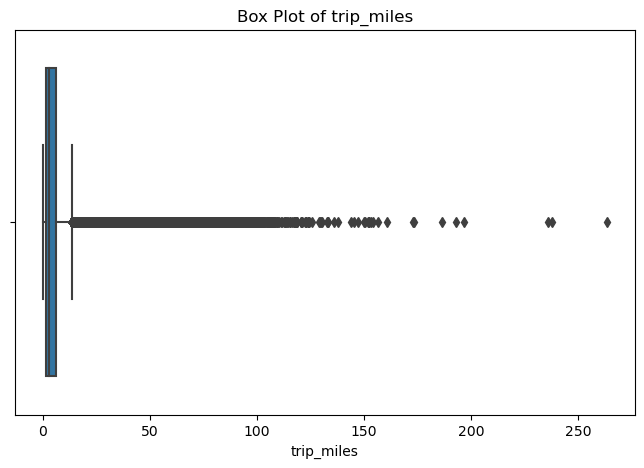

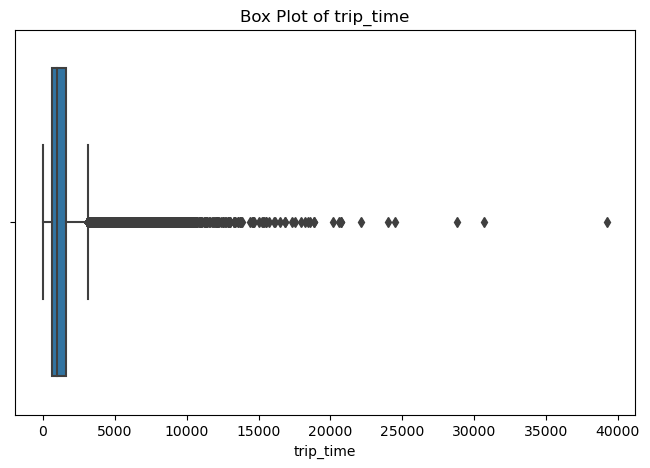

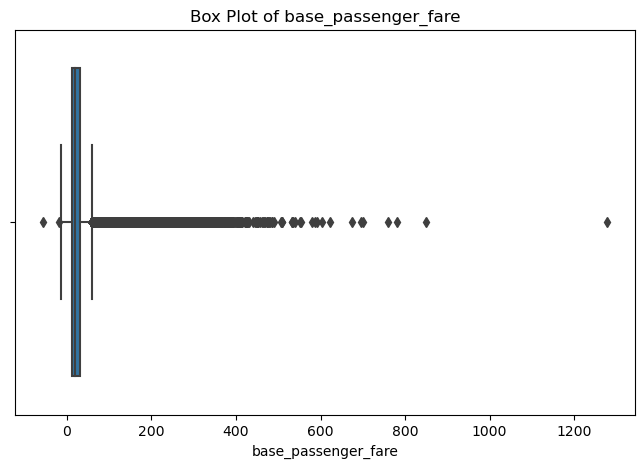

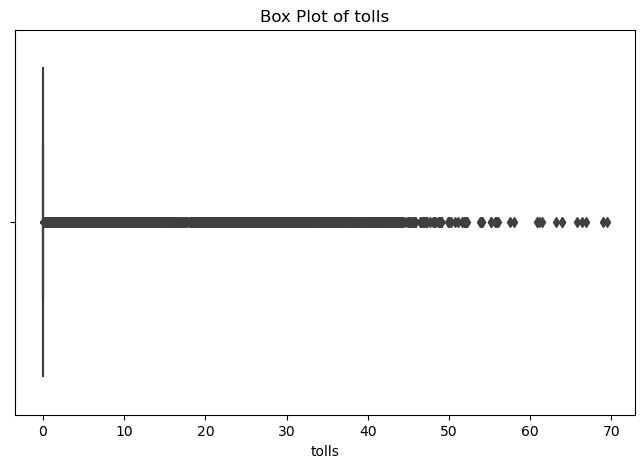

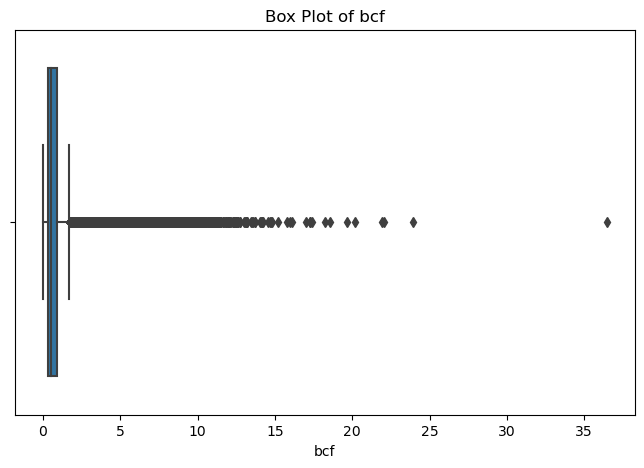

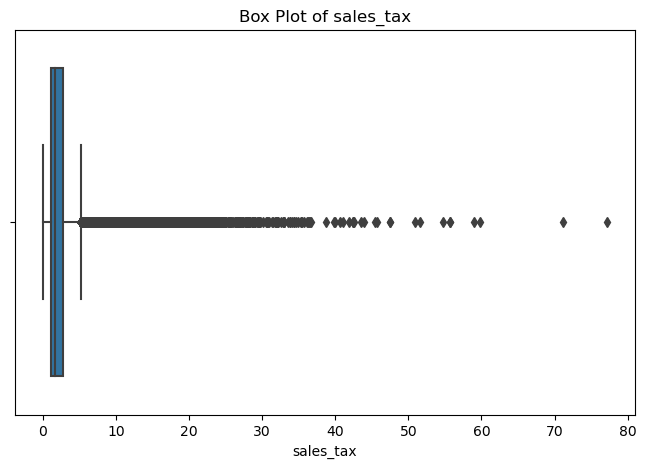

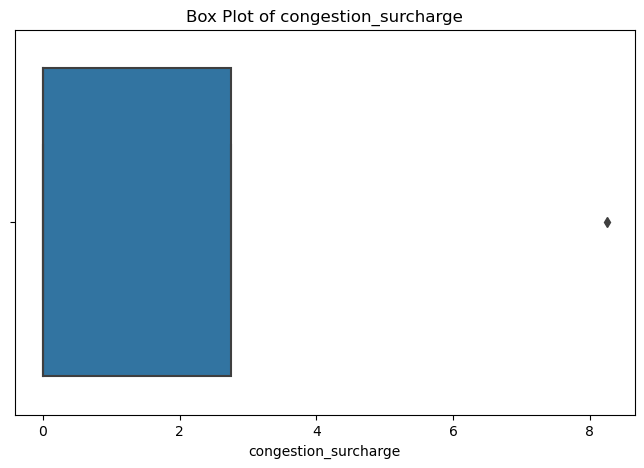

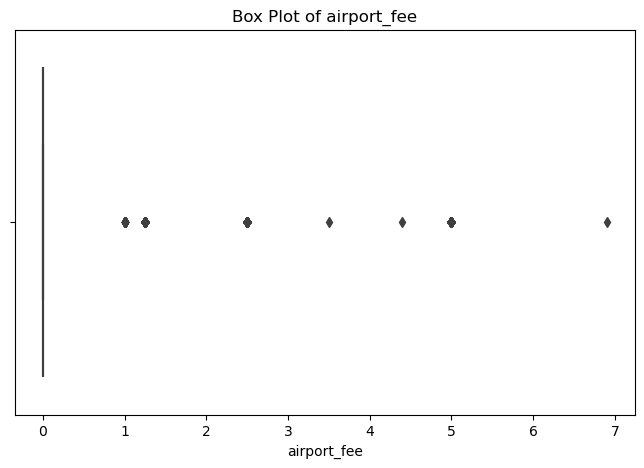

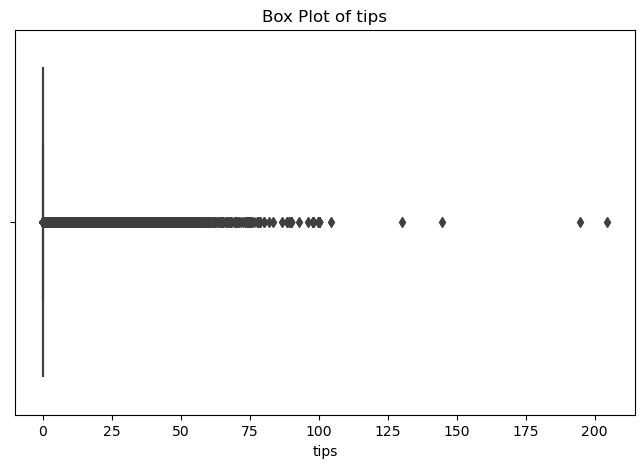

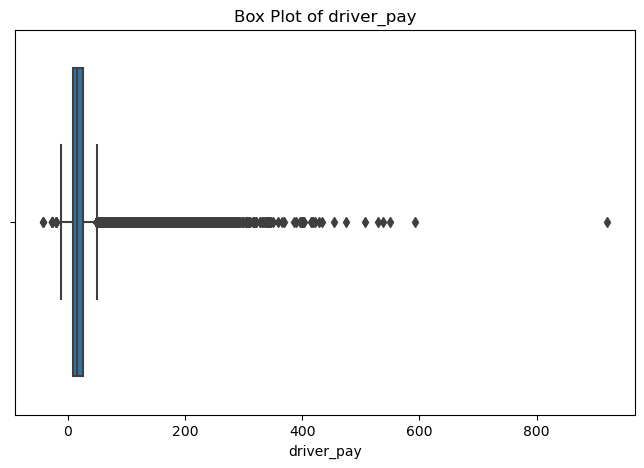

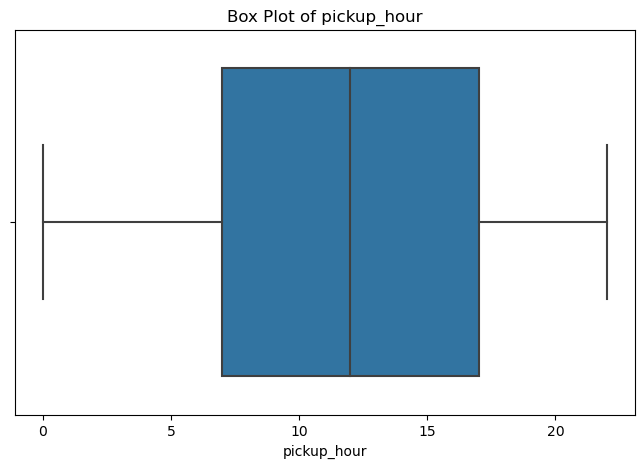

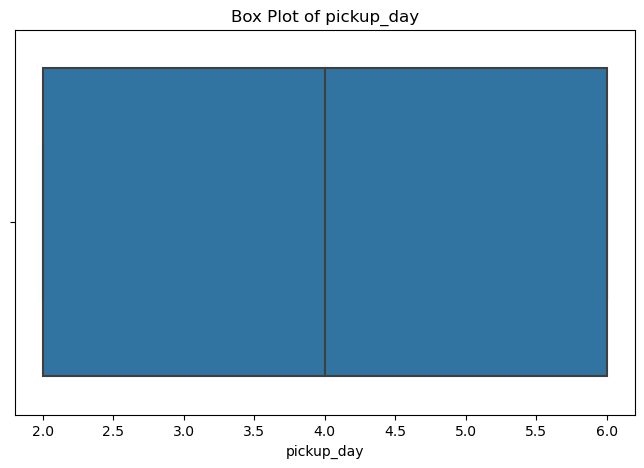

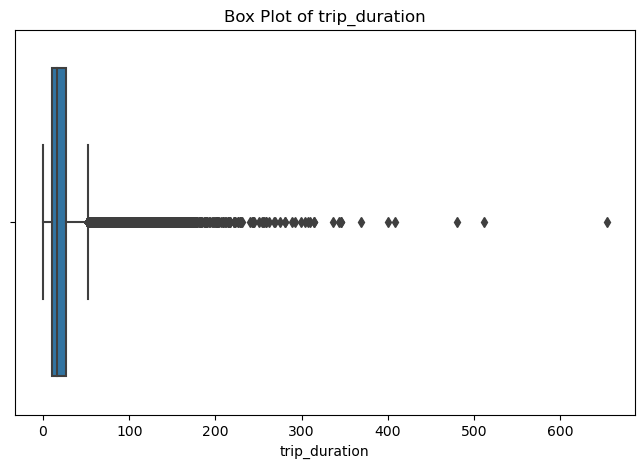

In [22]:
# Plotting boxplots for numerical variables
num_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns  # adjust types as necessary
for col in num_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=merged_df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

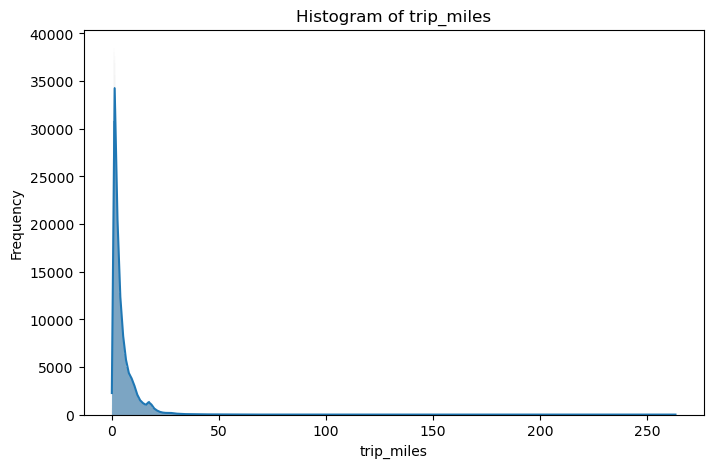

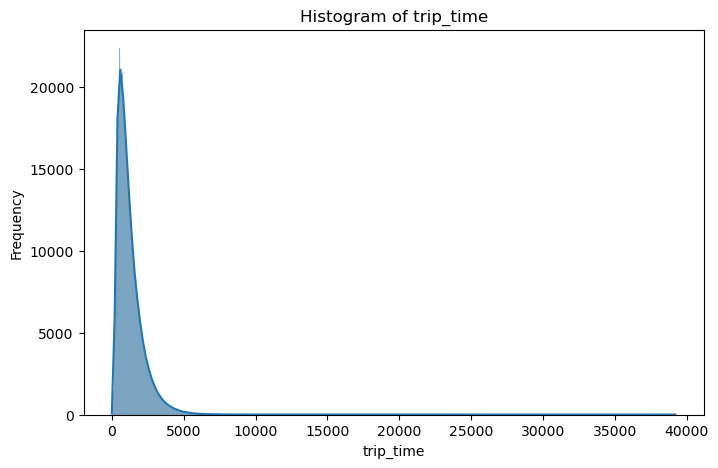

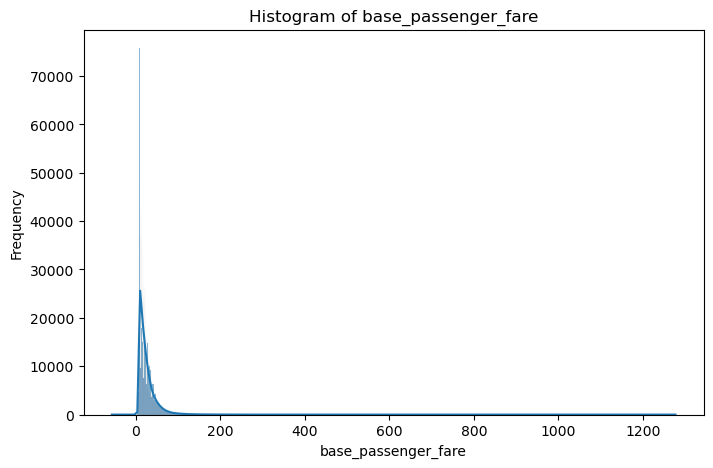

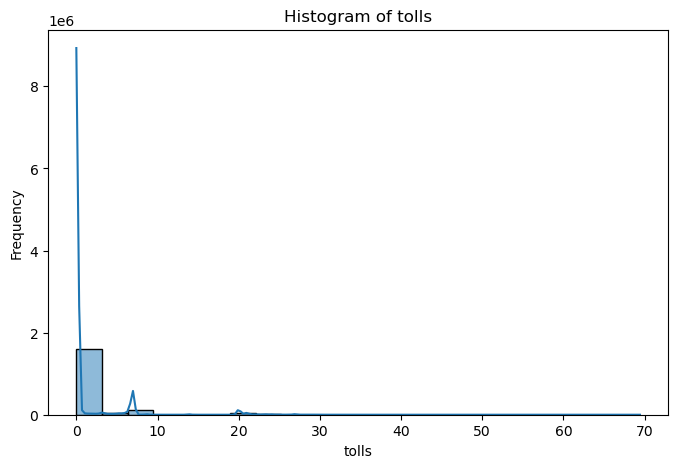

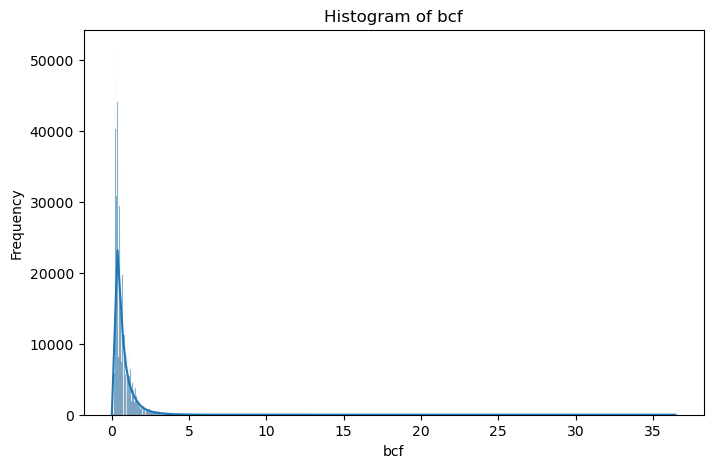

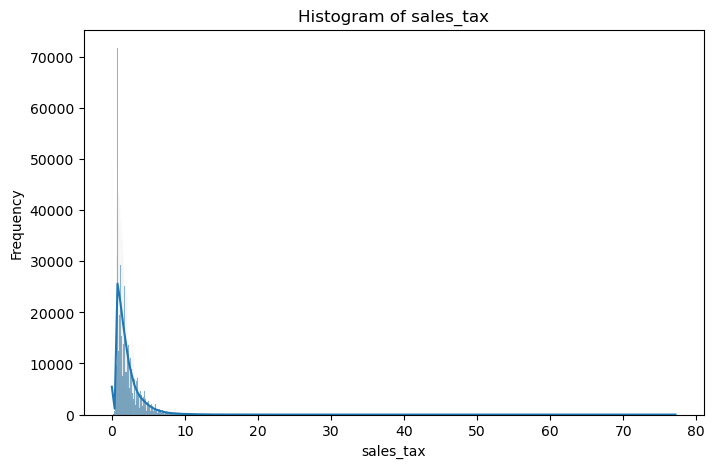

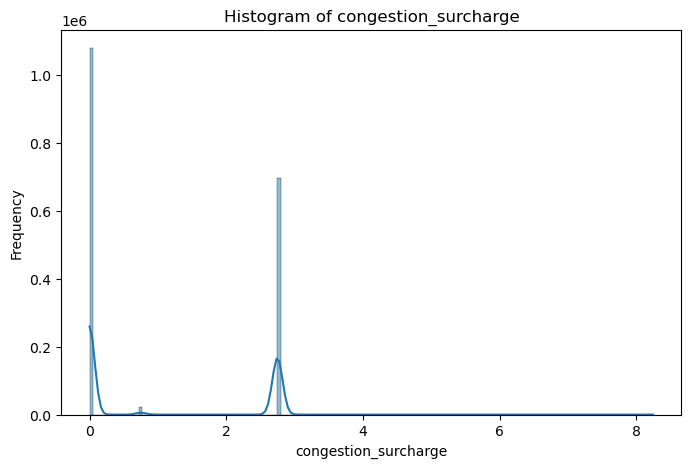

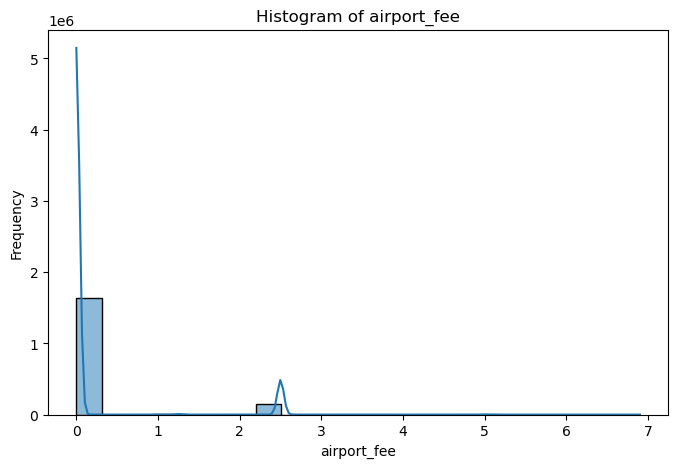

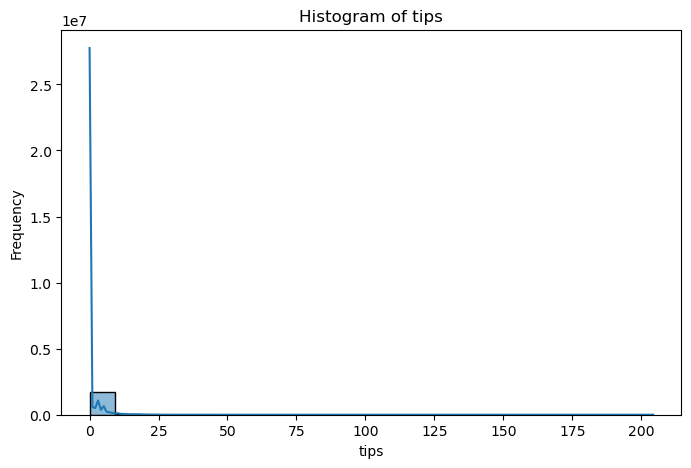

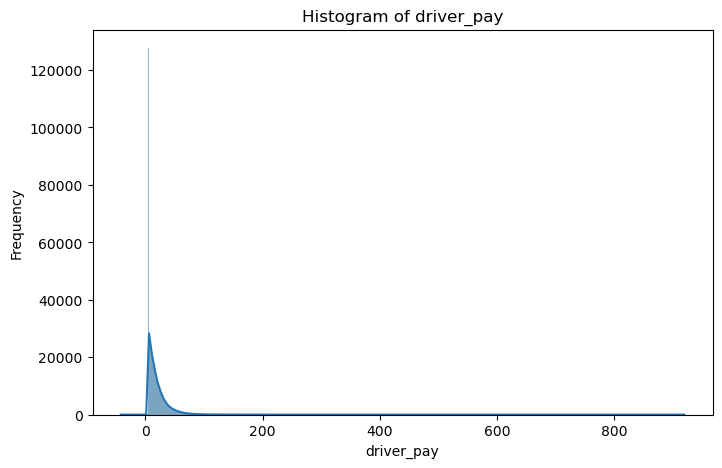

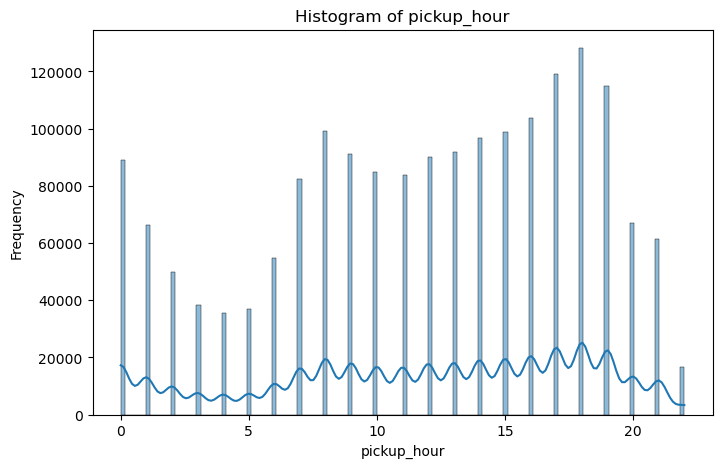

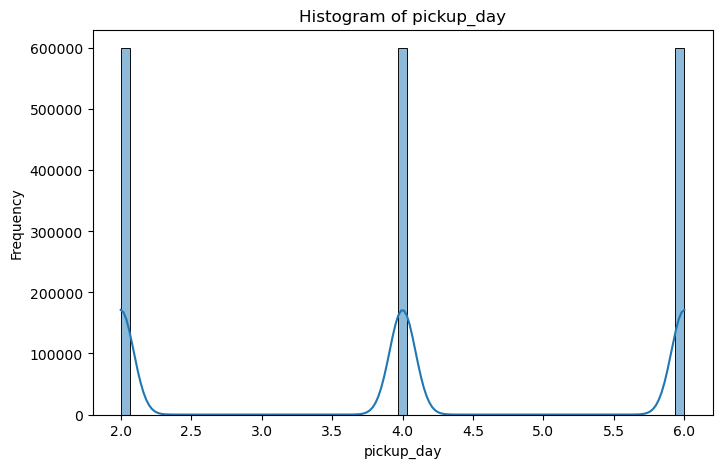

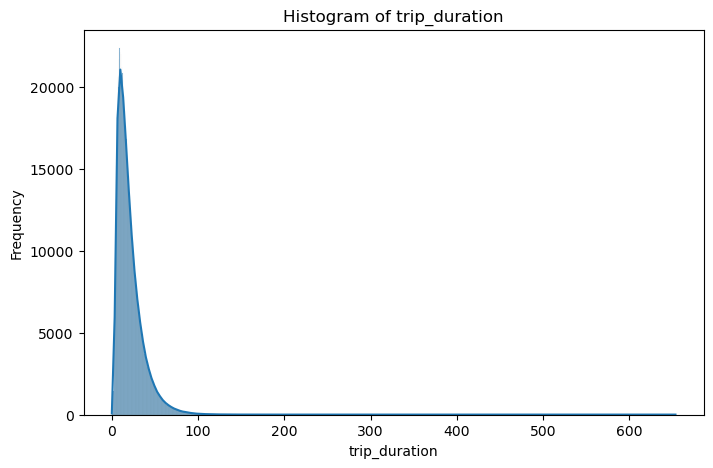

In [23]:
# Plotting histograms for numerical variables
for col in num_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(merged_df[col], kde=True)  # KDE (Kernel Density Estimate) adds a density curve
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


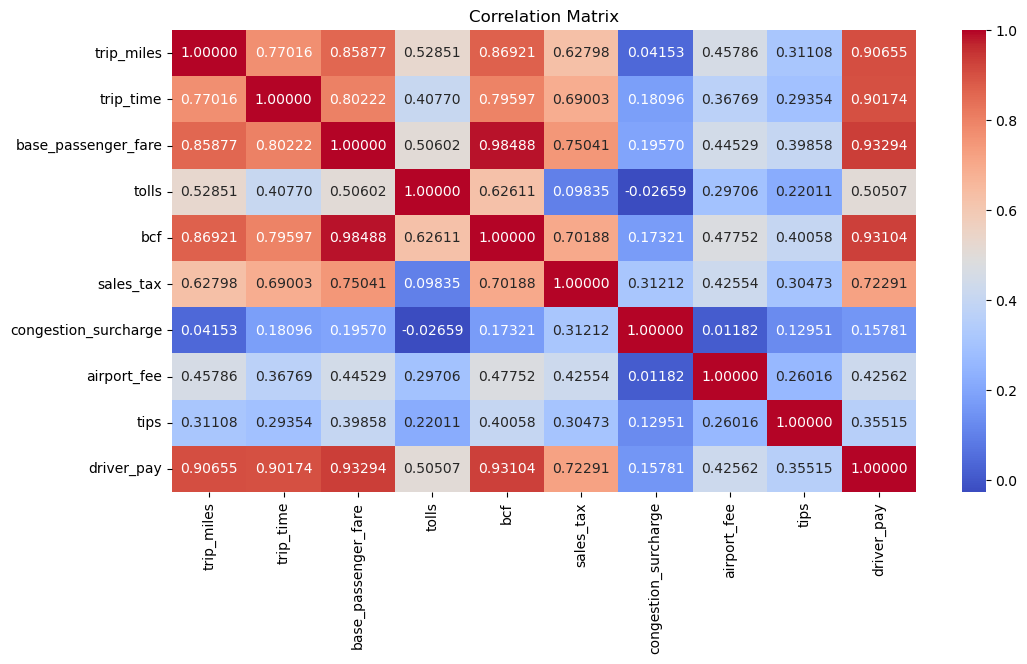

In [24]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(merged_df[['trip_miles', 'trip_time', 'base_passenger_fare', 'tolls', 'bcf',
       'sales_tax', 'congestion_surcharge', 'airport_fee', 'tips',
       'driver_pay']].corr(), annot=True, cmap='coolwarm', fmt=".5f")
plt.title('Correlation Matrix')
plt.show()

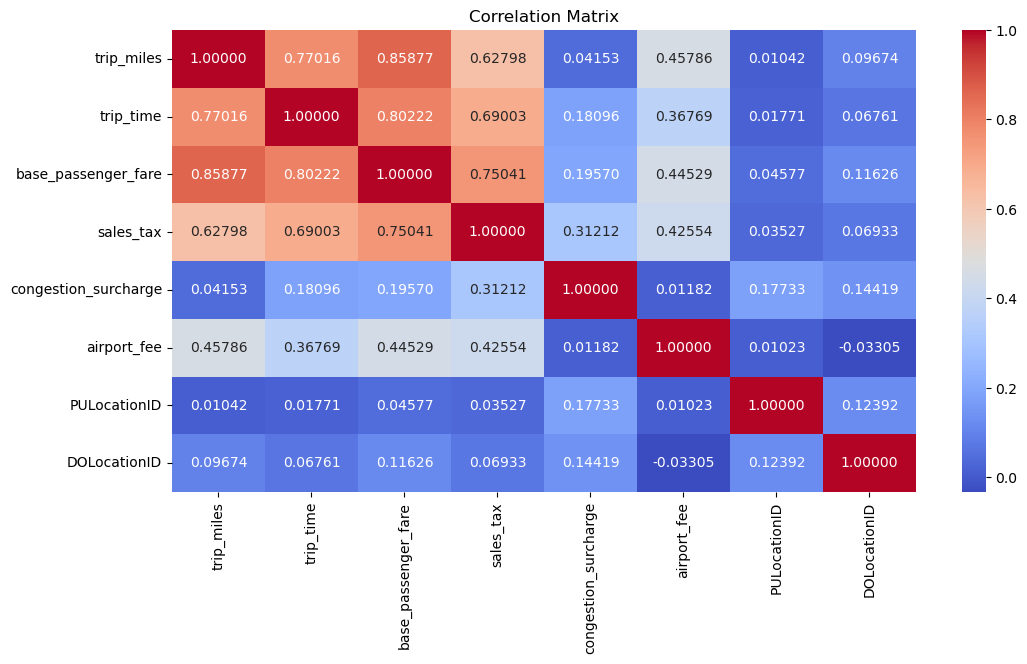

In [25]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(merged_df[['trip_miles', 'trip_time', 'base_passenger_fare',
       'sales_tax', 'congestion_surcharge', 'airport_fee', 'PULocationID', 'DOLocationID']].corr(), annot=True, cmap='coolwarm', fmt=".5f")
plt.title('Correlation Matrix')
plt.show()

In [26]:
# Convert 'request_datetime' to datetime format if it's not already
merged_df['request_datetime'] = pd.to_datetime(merged_df['request_datetime'])

# Extract the hour from 'request_datetime'
merged_df['request_hour'] = merged_df['request_datetime'].dt.hour

# Group by the extracted hour and count the number of rows for each hour
hourly_counts = merged_df.groupby('request_hour').size()

# Reset the index to make 'request_hour' a column (for easier plotting)
hourly_counts = hourly_counts.reset_index(name='count')

print(hourly_counts)

    request_hour   count
0              0   86447
1              1   64863
2              2   48441
3              3   37729
4              4   34476
5              5   37890
6              6   57105
7              7   85533
8              8   96942
9              9   90320
10            10   84570
11            11   84295
12            12   91638
13            13   91647
14            14   97216
15            15   98632
16            16  106308
17            17  121053
18            18  127209
19            19  108974
20            20   66379
21            21   57952
22            22   15101
23            23    9280


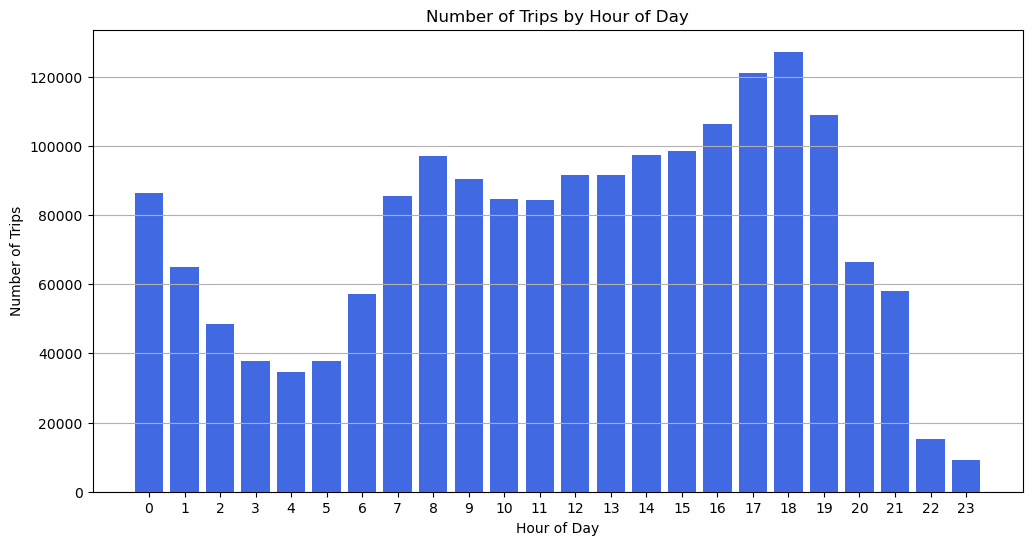

In [28]:
# Plotting
plt.figure(figsize=(12, 6))
plt.bar(hourly_counts['request_hour'], hourly_counts['count'], color='royalblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Hour of Day')
plt.xticks(hourly_counts['request_hour'])  # Ensure all hours are labeled
plt.grid(axis='y')

plt.show()

In [29]:
# Convert 'request_datetime' to datetime format if it's not already
merged_df['request_datetime'] = pd.to_datetime(merged_df['request_datetime'])

# Extract the hour from 'request_datetime'
merged_df['request_hour'] = merged_df['request_datetime'].dt.hour

# Group by the extracted hour and count the number of rows for each hour
hourly_counts = merged_df.groupby('request_hour').size()

# Reset the index to make 'request_hour' a column (for easier plotting)
hourly_counts = hourly_counts.reset_index(name='count')

print(hourly_counts)

    request_hour   count
0              0   86447
1              1   64863
2              2   48441
3              3   37729
4              4   34476
5              5   37890
6              6   57105
7              7   85533
8              8   96942
9              9   90320
10            10   84570
11            11   84295
12            12   91638
13            13   91647
14            14   97216
15            15   98632
16            16  106308
17            17  121053
18            18  127209
19            19  108974
20            20   66379
21            21   57952
22            22   15101
23            23    9280


In [30]:
#merged_df.to_csv('C:/Users/bhara/Downloads/your_filename.csv', index=False)

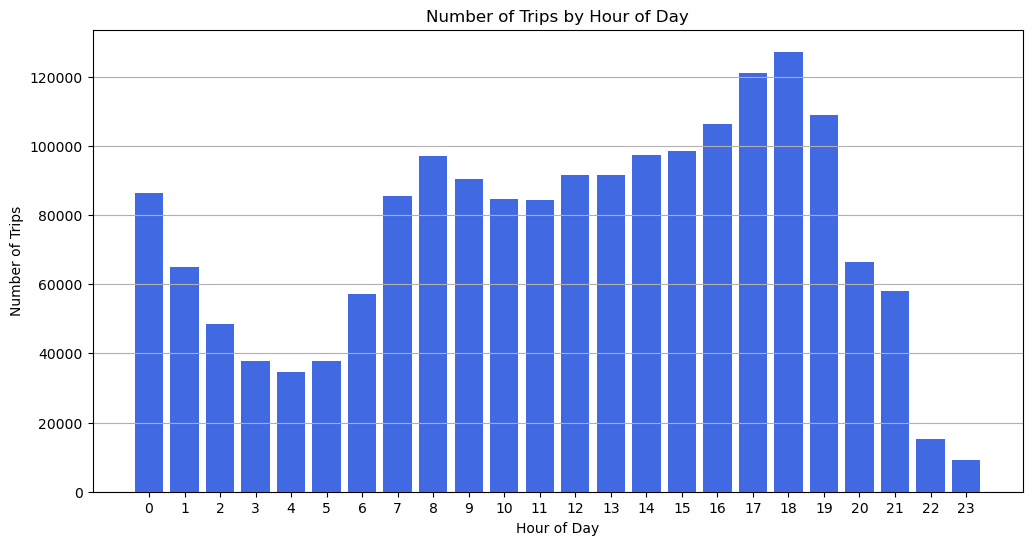

In [31]:
# Plotting
plt.figure(figsize=(12, 6))
plt.bar(hourly_counts['request_hour'], hourly_counts['count'], color='royalblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Hour of Day')
plt.xticks(hourly_counts['request_hour'])  # Ensure all hours are labeled
plt.grid(axis='y')

plt.show()

In [32]:
# First, ensure 'pickup_datetime' is in datetime format
merged_df['pickup_datetime'] = pd.to_datetime(merged_df['pickup_datetime'])

# Create 'pickup_day_of_week' based on 'pickup_datetime'
merged_df['pickup_day_of_week'] = merged_df['pickup_datetime'].dt.day_name()

# Now you can categorize into 'Weekday' and 'Weekend'
merged_df['day_type'] = merged_df['pickup_day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Ensure this step is successful by checking the new column
print(merged_df[['pickup_datetime', 'pickup_day_of_week', 'day_type']].head())

      pickup_datetime pickup_day_of_week day_type
0 2023-12-01 00:03:42             Friday  Weekday
1 2023-12-01 00:44:37             Friday  Weekday
2 2023-12-01 00:12:26             Friday  Weekday
3 2023-12-01 00:10:30             Friday  Weekday
4 2023-12-01 00:22:08             Friday  Weekday


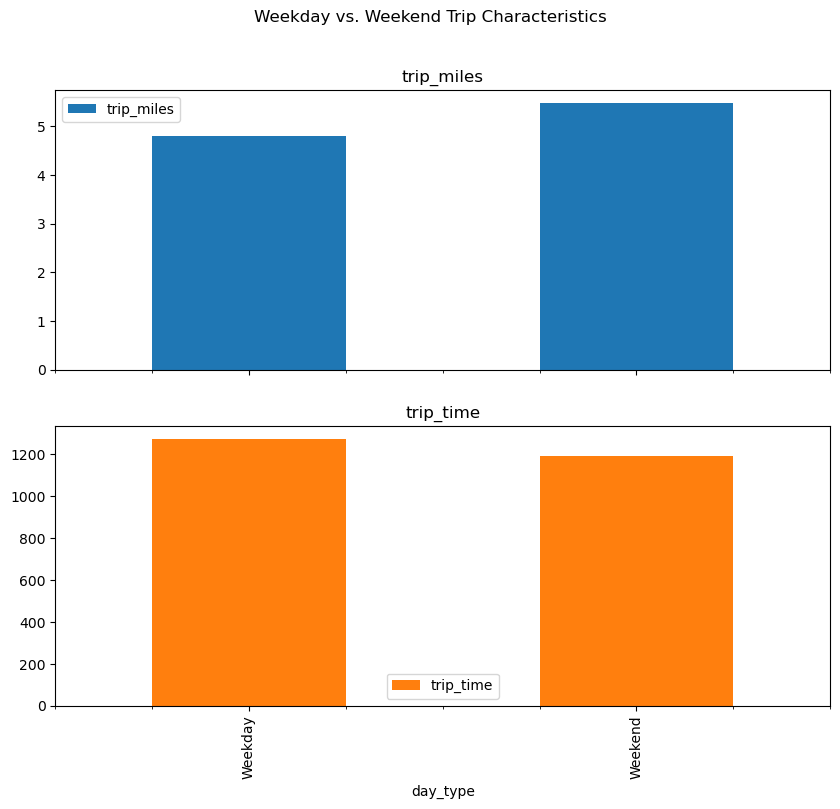

In [33]:
# Categorize data into 'Weekday' and 'Weekend'
merged_df['day_type'] = merged_df['pickup_day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Aggregate data by 'day_type'
day_type_comparison = merged_df.groupby('day_type')[['trip_miles', 'trip_time']].mean()

# Visualize the comparison
day_type_comparison.plot(kind='bar', subplots=True, figsize=(10, 8), title='Weekday vs. Weekend Trip Characteristics')
plt.show()

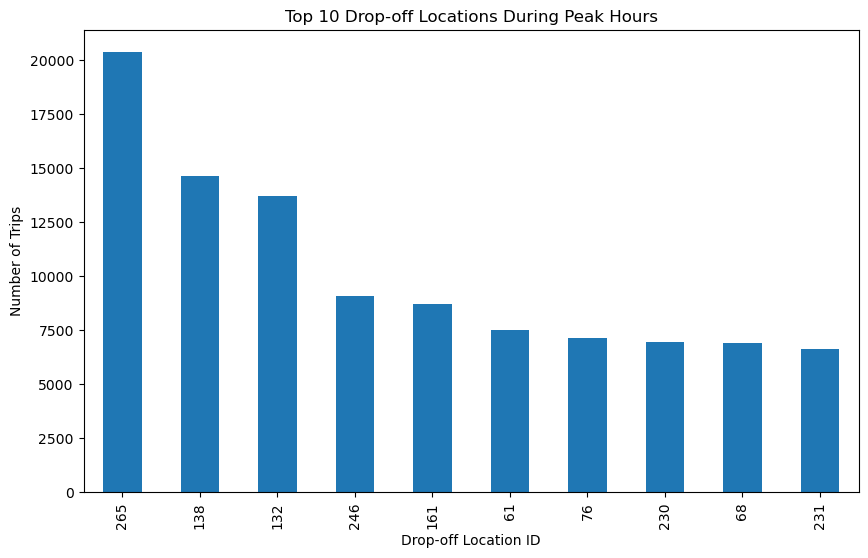

In [34]:
# Define peak hours, for example, 7-9 AM and 4-6 PM
merged_df['is_peak_hour'] = merged_df['pickup_hour'].apply(lambda x: 1 if x in range(7, 10) or x in range(16, 19) else 0)

# Analyze drop-off locations during peak hours
peak_hour_dropoff = merged_df[merged_df['is_peak_hour'] == 1]['DOLocationID'].value_counts().head(10)

# Visualize top 10 drop-off locations during peak hours
plt.figure(figsize=(10, 6))
peak_hour_dropoff.plot(kind='bar')
plt.title('Top 10 Drop-off Locations During Peak Hours')
plt.xlabel('Drop-off Location ID')
plt.ylabel('Number of Trips')
plt.show()

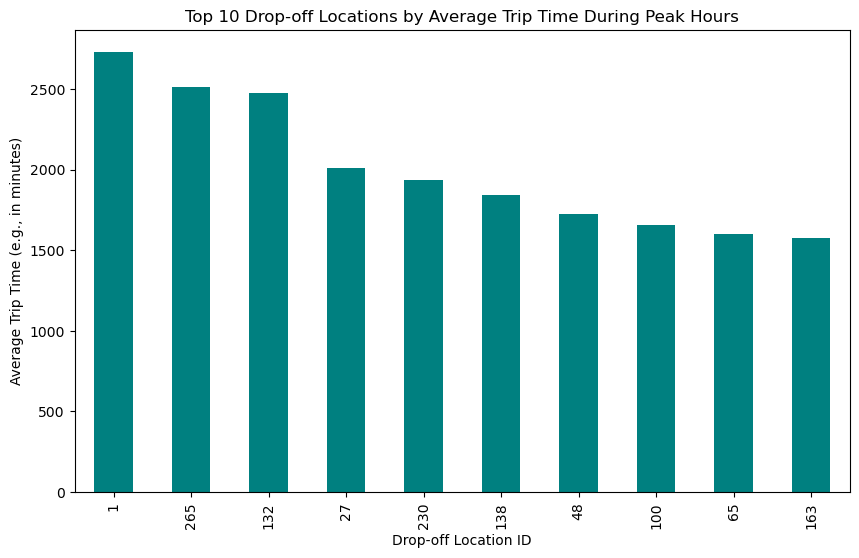

In [35]:
# Define peak hours, for example, 7-9 AM and 4-6 PM
merged_df['is_peak_hour'] = merged_df['pickup_hour'].apply(lambda x: 1 if x in range(7, 10) or x in range(16, 19) else 0)

# Calculate the average trip time to each drop-off location during peak hours
peak_hour_avg_trip_time = merged_df[merged_df['is_peak_hour'] == 1].groupby('DOLocationID')['trip_time'].mean()

# Sort the values and select the top 10 drop-off locations based on the average trip time
top_peak_hour_dropoff_locations = peak_hour_avg_trip_time.sort_values(ascending=False).head(10)

# Visualize average trip time for the top 10 drop-off locations during peak hours
plt.figure(figsize=(10, 6))
top_peak_hour_dropoff_locations.plot(kind='bar', color='teal')
plt.title('Top 10 Drop-off Locations by Average Trip Time During Peak Hours')
plt.xlabel('Drop-off Location ID')
plt.ylabel('Average Trip Time (e.g., in minutes)')
plt.show()

In [36]:
# Convert the 'request_datetime' column to datetime if it's not already
merged_df['request_datetime'] = pd.to_datetime(merged_df['request_datetime'])

# Extract month from the datetime column
merged_df['month'] = merged_df['request_datetime'].dt.month

# Group by month and count the number of rows in each month
monthly_counts = merged_df.groupby('month').size().reset_index(name='count')

# Show the resulting DataFrame
print(monthly_counts)

   month   count
0      9    4723
1     10  597097
2     11  600916
3     12  597264


In [37]:
# Extract the month from 'request_datetime'
merged_df['request_month'] = merged_df['request_datetime'].dt.month

# Group by the extracted month and count the rows for each month
monthly_counts = merged_df.groupby('request_month').size().reset_index(name='count')

# Sort the values by month to ensure proper chronological order
monthly_counts.sort_values('request_month', inplace=True)
print(merged_df['request_month'])

0          11
1          12
2          11
3          12
4          12
           ..
1799995    10
1799996    10
1799997    10
1799998    10
1799999    10
Name: request_month, Length: 1800000, dtype: int64


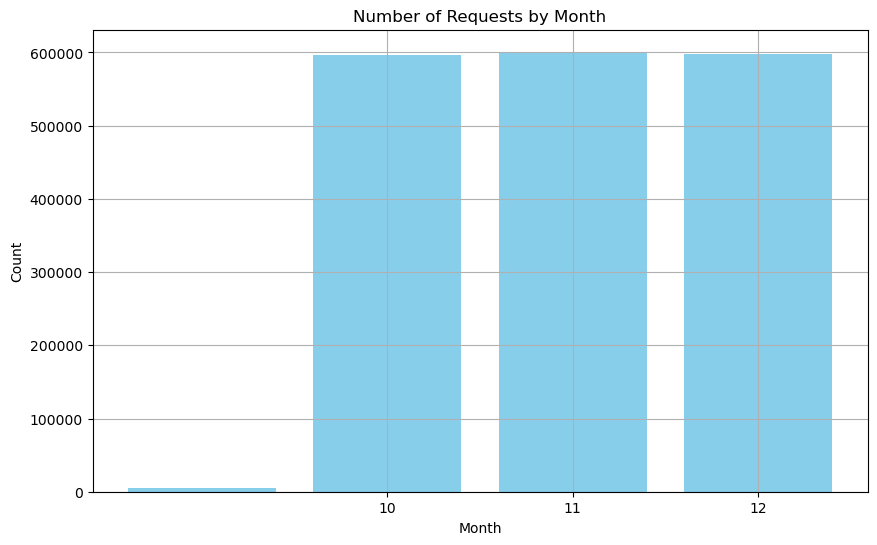

In [38]:
# Extract month from the datetime column
merged_df['month'] = merged_df['request_datetime'].dt.month

# Group by month and count the number of rows in each month
monthly_counts = merged_df.groupby('month').size().reset_index(name='count')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(monthly_counts['month'], monthly_counts['count'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Requests by Month')
plt.xticks(range(10, 13))  # Assuming 1-12 for months
plt.grid(True)
plt.show()

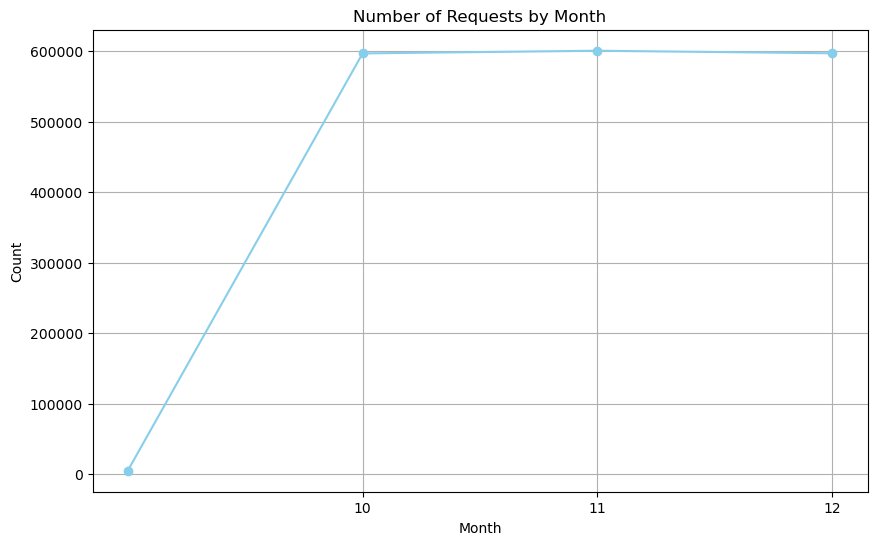

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts['month'], monthly_counts['count'], marker='o', color='skyblue', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Requests by Month')
plt.xticks(range(10, 13))      #for months
plt.grid(True)
plt.show()

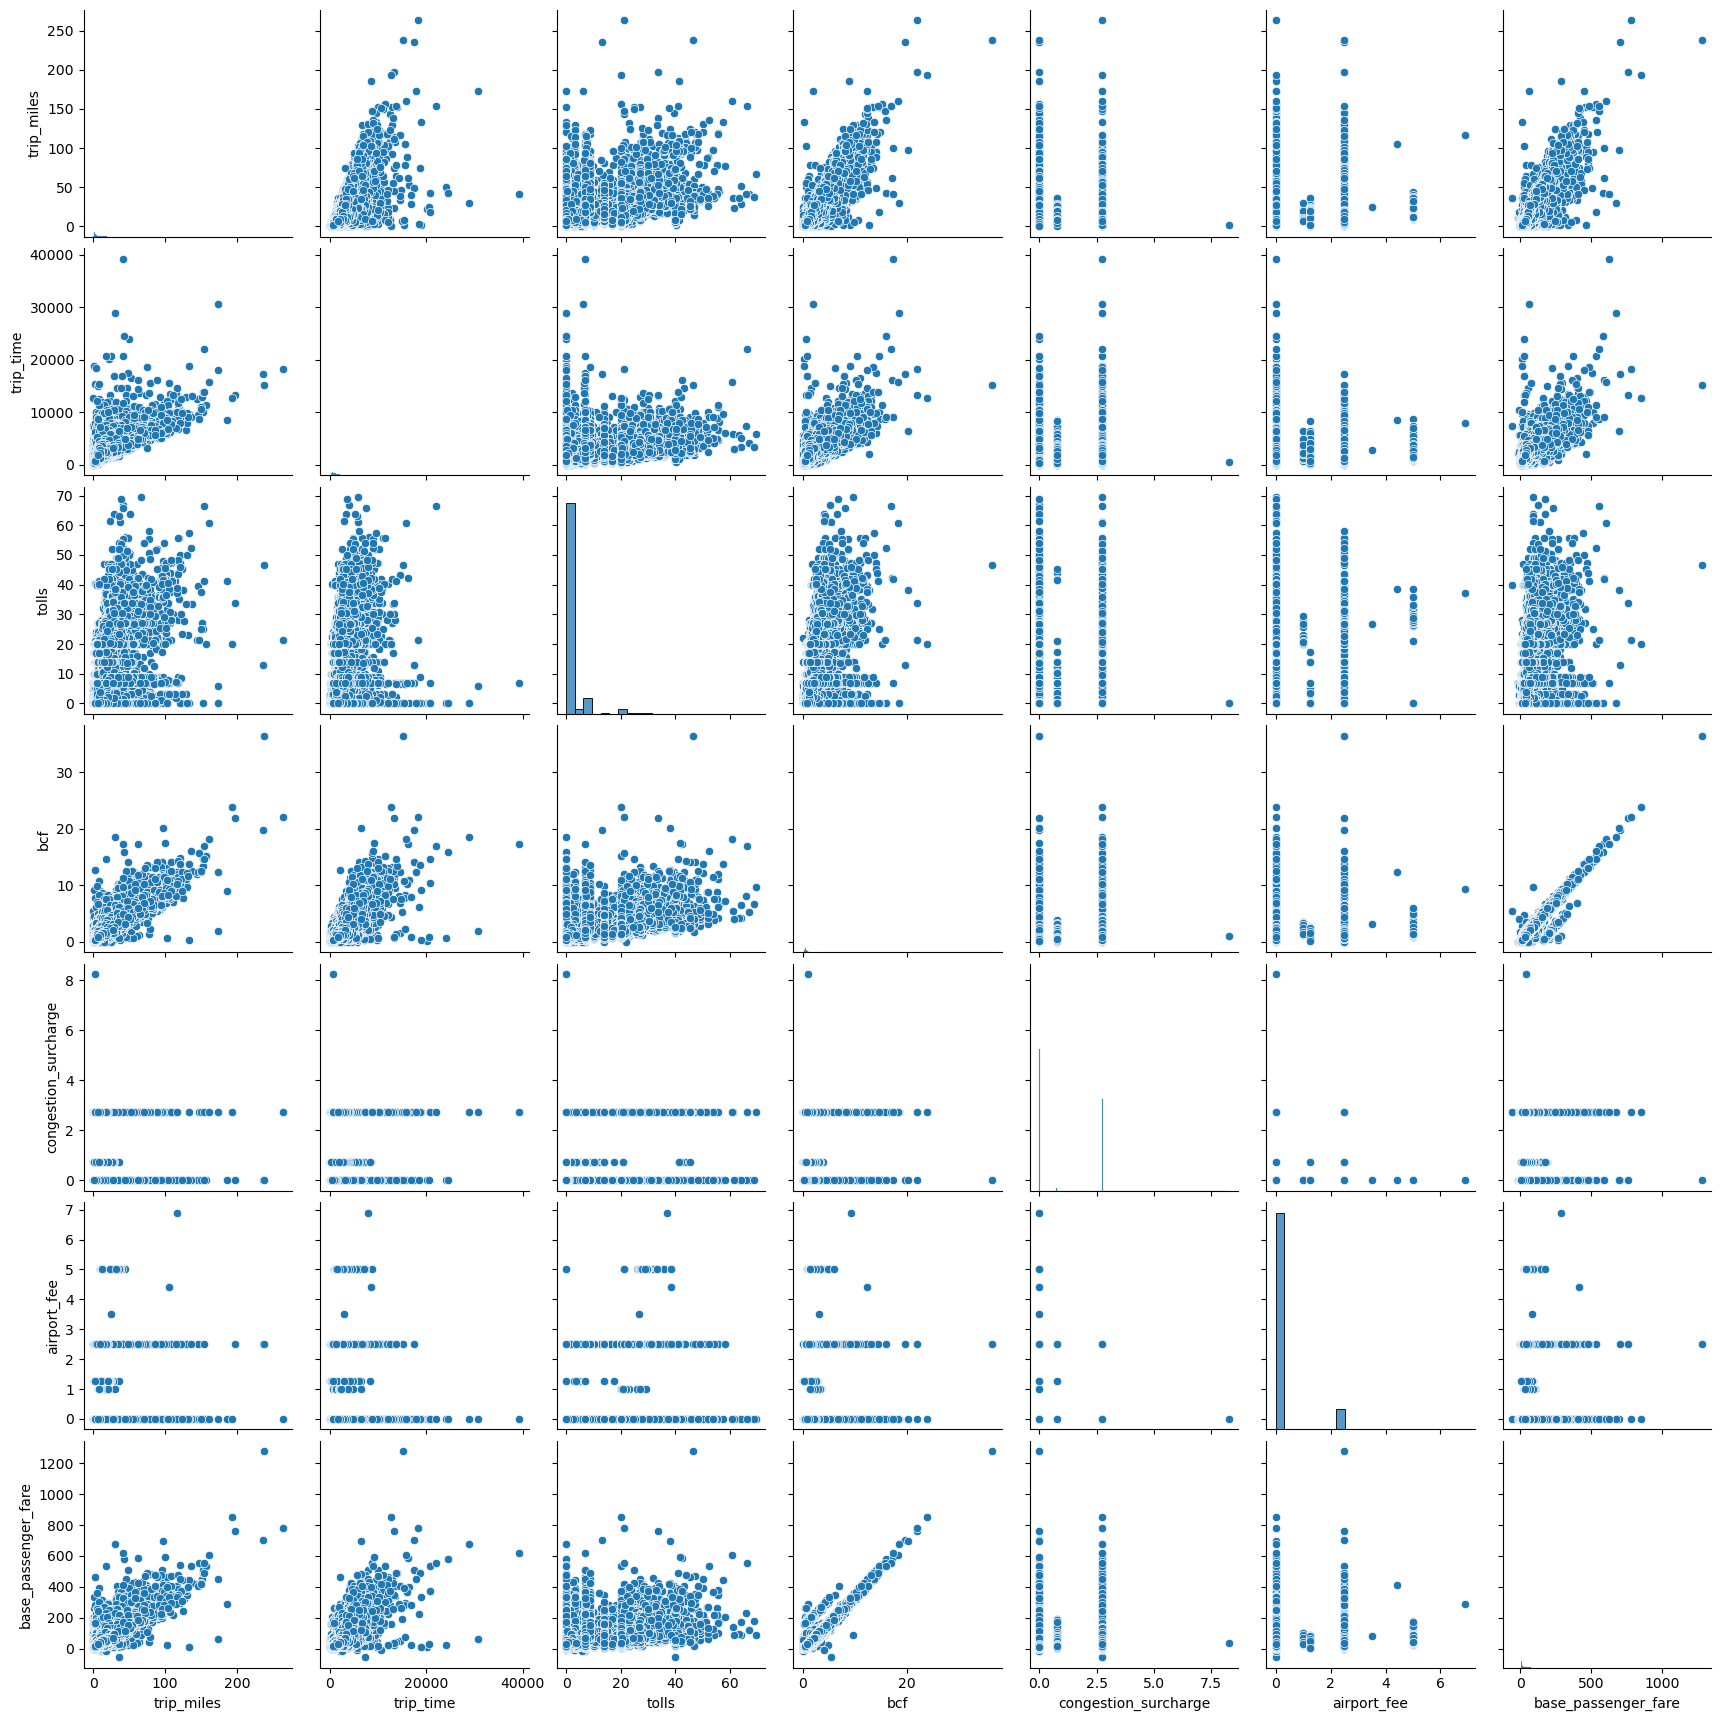

In [40]:
# Select the columns of interest
columns_of_interest = ['trip_miles', 'trip_time', 'tolls', 'bcf', 'congestion_surcharge', 'airport_fee', 'base_passenger_fare']
data_subset = merged_df[columns_of_interest]

# Create pairplots to visualize relationships
sns.pairplot(data_subset)
plt.show()

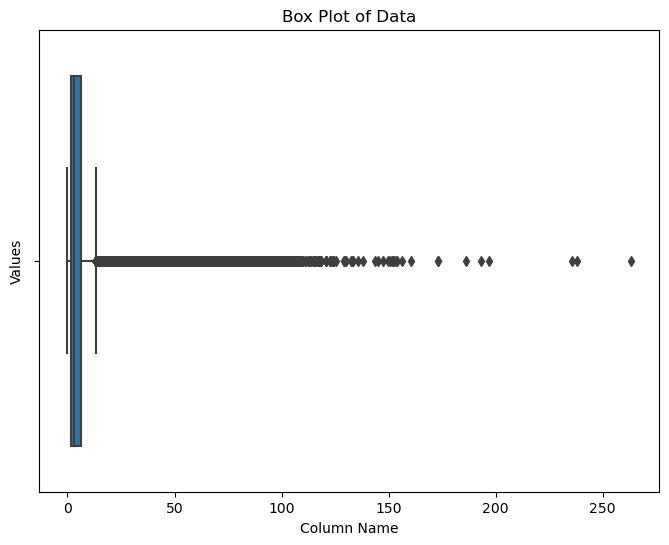

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame and 'column' is the column containing the data
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, x='trip_miles')
plt.title('Box Plot of Data')
plt.xlabel('Column Name')
plt.ylabel('Values')
plt.show()

In [42]:
data = merged_df[['trip_miles','trip_time','tolls', 'bcf', 'congestion_surcharge', 'airport_fee','base_passenger_fare']]

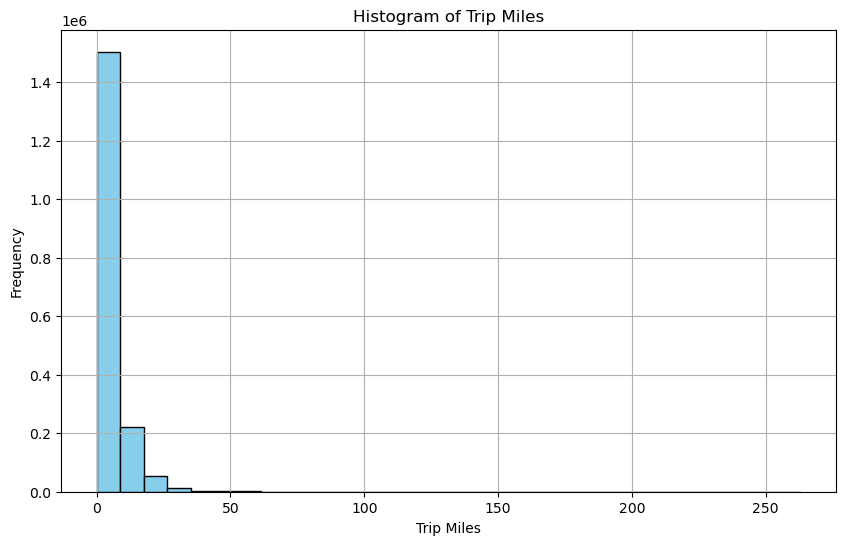

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(merged_df['trip_miles'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Trip Miles')
plt.xlabel('Trip Miles')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Model Evaluation 

### Linear Regression

In [45]:
# Selecting relevant features and the target variable
features = ['trip_miles', 'trip_time', 'pickup_hour', 'pickup_day']
X = merged_df[features]
y = merged_df['base_passenger_fare']

# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,  y_pred)
rmse = mean_squared_error(y_test,  y_pred, squared=False)  # Calculate RMSE by taking square root of MSE
r2 = r2_score(y_test,  y_pred)

# Print evaluation metrics
print(model)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

LinearRegression()
Mean Absolute Error (MAE): 5.642925980791948
Mean Squared Error (MSE): 97.7479317479253
Root Mean Squared Error (RMSE): 9.886755370086048
R-squared (R^2): 0.7903407172793527


In [47]:
# Predict on the training set
y_train_pred = model.predict(X_train)

# Calculate evaluation metrics for the training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

# Print evaluation metrics for the training set
print("Training Set Metrics:")
print("Mean Absolute Error (MAE):", train_mae)
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R-squared (R^2):", train_r2)


Training Set Metrics:
Mean Absolute Error (MAE): 5.653263585913293
Mean Squared Error (MSE): 98.77434170884571
Root Mean Squared Error (RMSE): 9.938528146000579
R-squared (R^2): 0.786796477293012


In [48]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are your features and target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Ridge Regression model
ridge_reg = Ridge(alpha=1.0)  # alpha is the regularization strength

# Fit the model on the training data
ridge_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_reg.predict(X_test)

# Calculate and print the metrics
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred))
print("Ridge Regression R2:", r2_score(y_test, y_pred))



Ridge Regression MSE: 97.74793184895256
Ridge Regression R2: 0.7903407170626596


### Decision Tree

In [49]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the testing set
dt_y_pred = dt_model.predict(X_test)

# Calculate evaluation metrics for Decision Tree
dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_rmse = mean_squared_error(y_test, dt_y_pred, squared=False)
dt_r2 = r2_score(y_test, dt_y_pred)

# Print evaluation metrics for Decision Tree
print("Decision Tree Regressor Metrics:")
print("Mean Absolute Error (MAE):", dt_mae)
print("Mean Squared Error (MSE):", dt_mse)
print("Root Mean Squared Error (RMSE):", dt_rmse)
print("R-squared (R^2):", dt_r2)


Decision Tree Regressor Metrics:
Mean Absolute Error (MAE): 7.880603766203703
Mean Squared Error (MSE): 192.81389094828123
Root Mean Squared Error (RMSE): 13.885744162567638
R-squared (R^2): 0.5864339904496059


In [50]:
# Predict on the training set
dt_y_train_pred = dt_model.predict(X_train)

# Calculate evaluation metrics for the training set
dt_train_mae = mean_absolute_error(y_train, dt_y_train_pred)
dt_train_mse = mean_squared_error(y_train, dt_y_train_pred)
dt_train_rmse = mean_squared_error(y_train, dt_y_train_pred, squared=False)
dt_train_r2 = r2_score(y_train, dt_y_train_pred)

# Print evaluation metrics for the training set
print("Decision Tree Regressor Training Set Metrics:")
print("Mean Absolute Error (MAE):", dt_train_mae)
print("Mean Squared Error (MSE):", dt_train_mse)
print("Root Mean Squared Error (RMSE):", dt_train_rmse)
print("R-squared (R^2):", dt_train_r2)

Decision Tree Regressor Training Set Metrics:
Mean Absolute Error (MAE): 0.06321777777777775
Mean Squared Error (MSE): 0.41741982447916665
Root Mean Squared Error (RMSE): 0.6460803545064396
R-squared (R^2): 0.999099003086358


### XG Boost

In [51]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [52]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', 
                             colsample_bytree = 0.7, 
                             learning_rate = 0.1,
                             max_depth = 5, 
                             gamma = 0.2, 
                             n_estimators = 300)


# Fit the model with the training data
xgb_model.fit(X_train, y_train)

# Predict on the testing set
xgb_y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics for XGBoost on the testing set
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = mean_squared_error(y_test, xgb_y_pred, squared=False)
xgb_r2 = r2_score(y_test, xgb_y_pred)

# Print evaluation metrics for XGBoost on the testing set
print("XGBoost Regressor Testing Set Metrics:")
print("Mean Absolute Error (MAE):", xgb_mae)
print("Mean Squared Error (MSE):", xgb_mse)
print("Root Mean Squared Error (RMSE):", xgb_rmse)
print("R-squared (R^2):", xgb_r2)


XGBoost Regressor Testing Set Metrics:
Mean Absolute Error (MAE): 5.4247530967091455
Mean Squared Error (MSE): 96.85156745847779
Root Mean Squared Error (RMSE): 9.84131939622314
R-squared (R^2): 0.7922633266954436


In [53]:
# Predict on the training set
xgb_y_train_pred = xgb_model.predict(X_train)

# Calculate evaluation metrics for XGBoost on the training set
xgb_train_mae = mean_absolute_error(y_train, xgb_y_train_pred)
xgb_train_mse = mean_squared_error(y_train, xgb_y_train_pred)
xgb_train_rmse = mean_squared_error(y_train, xgb_y_train_pred, squared=False)
xgb_train_r2 = r2_score(y_train, xgb_y_train_pred)

# Print evaluation metrics for XGBoost on the training set
print("XGBoost Regressor Training Set Metrics:")
print("Mean Absolute Error (MAE):", xgb_train_mae)
print("Mean Squared Error (MSE):", xgb_train_mse)
print("Root Mean Squared Error (RMSE):", xgb_train_rmse)
print("R-squared (R^2):", xgb_train_r2)


XGBoost Regressor Training Set Metrics:
Mean Absolute Error (MAE): 5.426652744753982
Mean Squared Error (MSE): 97.07089875199077
Root Mean Squared Error (RMSE): 9.852456483131036
R-squared (R^2): 0.7904733434998497


Hyper Parameter Tuning

In [54]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define the parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.3, 0.7, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initialize the estimator
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Initialize RandomizedSearchCV
rnd_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, random_state=42)

# Perform the search
rnd_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", rnd_search.best_params_)
print("Best score found: ", rnd_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best score found:  -97.13050521578195


In [55]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', 
                             colsample_bytree = 1.0, 
                             learning_rate = 0.1,
                             max_depth = 5, 
                             gamma = 0.2, 
                             n_estimators = 200)


# Fit the model with the training data
xgb_model.fit(X_train, y_train)

# Predict on the testing set
xgb_y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics for XGBoost on the testing set
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = mean_squared_error(y_test, xgb_y_pred, squared=False)
xgb_r2 = r2_score(y_test, xgb_y_pred)

# Print evaluation metrics for XGBoost on the testing set
print("XGBoost Regressor Testing Set Metrics:")
print("Mean Absolute Error (MAE):", xgb_mae)
print("Mean Squared Error (MSE):", xgb_mse)
print("Root Mean Squared Error (RMSE):", xgb_rmse)
print("R-squared (R^2):", xgb_r2)

XGBoost Regressor Testing Set Metrics:
Mean Absolute Error (MAE): 5.383786801333534
Mean Squared Error (MSE): 95.91592795186195
Root Mean Squared Error (RMSE): 9.793667747675634
R-squared (R^2): 0.7942701774219434


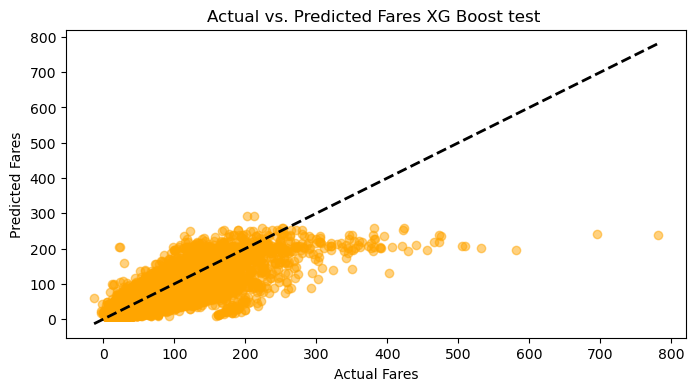

In [56]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, xgb_y_pred, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.title('Actual vs. Predicted Fares XG Boost test ')
plt.xlabel('Actual Fares')
plt.ylabel('Predicted Fares')
plt.show()

In [57]:
# Predict on the training set
xgb_y_train_pred = xgb_model.predict(X_train)

# Calculate evaluation metrics for XGBoost on the training set
xgb_train_mae = mean_absolute_error(y_train, xgb_y_train_pred)
xgb_train_mse = mean_squared_error(y_train, xgb_y_train_pred)
xgb_train_rmse = mean_squared_error(y_train, xgb_y_train_pred, squared=False)
xgb_train_r2 = r2_score(y_train, xgb_y_train_pred)

# Print evaluation metrics for XGBoost on the training set
print("XGBoost Regressor Training Set Metrics:")
print("Mean Absolute Error (MAE):", xgb_train_mae)
print("Mean Squared Error (MSE):", xgb_train_mse)
print("Root Mean Squared Error (RMSE):", xgb_train_rmse)
print("R-squared (R^2):", xgb_train_r2)


XGBoost Regressor Training Set Metrics:
Mean Absolute Error (MAE): 5.382734109114937
Mean Squared Error (MSE): 95.74725292894472
Root Mean Squared Error (RMSE): 9.785052525609903
R-squared (R^2): 0.7933304210303854


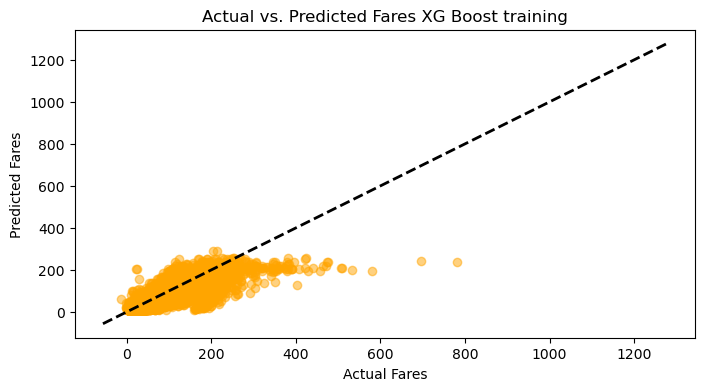

In [58]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, xgb_y_pred, alpha=0.5, color='orange')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Diagonal line
plt.title('Actual vs. Predicted Fares XG Boost training')
plt.xlabel('Actual Fares')
plt.ylabel('Predicted Fares')
plt.show()

### Fully Controlled Neural Network

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Model initialization
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.1),  # Helps prevent overfitting
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Model compilation
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Model training
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
performance = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {performance[0]}, Test MAE: {performance[1]}")


C:\Users\bhara\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 42s 1ms/step - loss: 219.6802 - mae: 7.5584 - val_loss: 106.8572 - val_mae: 5.3872
Epoch 2/10
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 42s 1ms/step - loss: 103.7308 - mae: 5.7475 - val_loss: 108.4835 - val_mae: 5.4548
Epoch 3/10
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step - loss: 101.6702 - mae: 5.7478 - val_loss: 101.8390 - val_mae: 5.3599
Epoch 4/10
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 42s 1ms/step - loss: 101.1147 - mae: 5.7276 - val_loss: 124.0564 - val_mae: 5.7062
Epoch 5/10
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 44s 1ms/step - loss: 103.0068 - mae: 5.7604 - val_loss: 127.6563 - val_mae: 5.8431
Epoch 6/10
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - loss: 104.6585 - mae: 5.8157 - val_loss: 112.6834 - val_mae: 5.4847
Epoch 7/10
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 47s 1ms/step - loss: 100.4073 - mae: 5.7107 - val_loss: 101.0985 - val_mae: 5.4031
Epoch 8/10
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 42s 1ms/step - loss: 106.1688 - mae: 5.8157 - val_loss: 107.0772 - 

In [41]:
# Predict on the testing set
test_predictions = model.predict(X_test)

# Calculate evaluation metrics for the test set
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_r2 = r2_score(y_test, test_predictions)

# Print evaluation metrics for the test set
print("Test Set Metrics:")
print("Mean Absolute Error (MAE):", test_mae)
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R-squared (R^2):", test_r2)


11250/11250 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step
Test Set Metrics:
Mean Absolute Error (MAE): 5.324647217886287
Mean Squared Error (MSE): 102.65123052721894
Root Mean Squared Error (RMSE): 10.131694356188353
R-squared (R^2): 0.7798236445735811


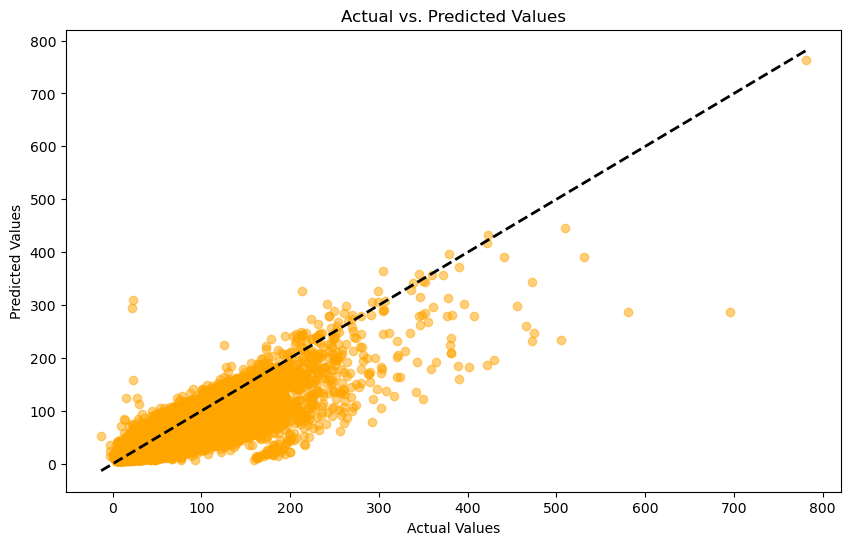

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Ideal line where actual = predicted
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [43]:
# Predict on the training set
y_train_pred = model.predict(X_train)

# Calculate evaluation metrics for the training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE
train_r2 = r2_score(y_train, y_train_pred)

# Print evaluation metrics for the training set
print("Neural Network Model Training Set Metrics:")
print("Mean Absolute Error (MAE):", train_mae)
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R-squared (R^2):", train_r2)

45000/45000 ━━━━━━━━━━━━━━━━━━━━ 73s 2ms/step
Neural Network Model Training Set Metrics:
Mean Absolute Error (MAE): 5.348398452766313
Mean Squared Error (MSE): 103.895154765251
Root Mean Squared Error (RMSE): 10.192897270415855
R-squared (R^2): 0.7757432486522408


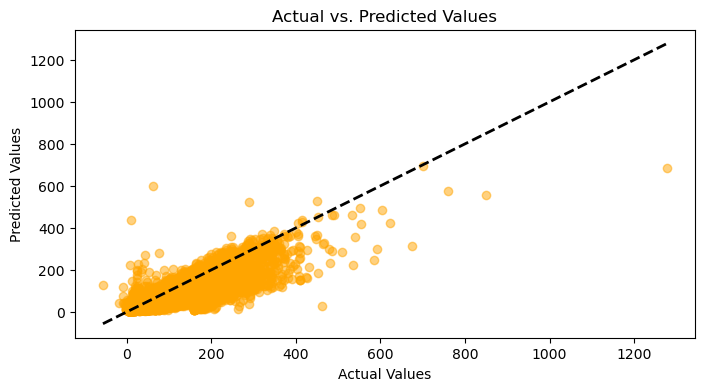

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.scatter(y_train, y_train_pred , alpha=0.5, color='orange')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Ideal line where actual = predicted
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Model initialization
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.1),  # Helps prevent overfitting
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Model compilation
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Model training
history = model.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=32, verbose=1)

# Evaluate the model
performance = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {performance[0]}, Test MAE: {performance[1]}")

C:\Users\bhara\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 91s 2ms/step - loss: 163.0453 - mae: 7.0377 - val_loss: 112.8423 - val_mae: 5.6226
Epoch 2/15
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 95s 3ms/step - loss: 102.9529 - mae: 5.7916 - val_loss: 97.4336 - val_mae: 5.5898
Epoch 3/15
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 92s 3ms/step - loss: 101.2968 - mae: 5.7256 - val_loss: 98.2488 - val_mae: 5.4244
Epoch 4/15
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 91s 3ms/step - loss: 99.3439 - mae: 5.6909 - val_loss: 100.2089 - val_mae: 5.3606
Epoch 5/15
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 87s 2ms/step - loss: 103.4923 - mae: 5.7841 - val_loss: 104.4573 - val_mae: 5.3350
Epoch 6/15
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 93s 3ms/step - loss: 98.1927 - mae: 5.6757 - val_loss: 127.8500 - val_mae: 5.9078
Epoch 7/15
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 92s 3ms/step - loss: 101.5478 - mae: 5.7328 - val_loss: 108.4518 - val_mae: 5.4233
Epoch 8/15
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 93s 3ms/step - loss: 104.3565 - mae: 5.8183 - val_loss: 119.6016 - val_

In [46]:
# Predict on the testing set
test_predictions = model.predict(X_test)

# Calculate evaluation metrics for the test set
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_r2 = r2_score(y_test, test_predictions)

# Print evaluation metrics for the test set
print("Test Set Metrics:")
print("Mean Absolute Error (MAE):", test_mae)
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R-squared (R^2):", test_r2)


11250/11250 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step
Test Set Metrics:
Mean Absolute Error (MAE): 5.400072498923724
Mean Squared Error (MSE): 102.14927903532332
Root Mean Squared Error (RMSE): 10.10689264983671
R-squared (R^2): 0.7809002790135076


In [47]:
# Predict on the training set
y_train_pred = model.predict(X_train)

# Calculate evaluation metrics for the training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE
train_r2 = r2_score(y_train, y_train_pred)

# Print evaluation metrics for the training set
print("Neural Network Model Training Set Metrics:")
print("Mean Absolute Error (MAE):", train_mae)
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R-squared (R^2):", train_r2)

45000/45000 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step
Neural Network Model Training Set Metrics:
Mean Absolute Error (MAE): 5.417160625241171
Mean Squared Error (MSE): 103.18459587031151
Root Mean Squared Error (RMSE): 10.157981879798344
R-squared (R^2): 0.7772769835966703


## 25 Epochs

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Model initialization
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.1),  # Helps prevent overfitting
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Model compilation
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Model training
history = model.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=32, verbose=1)

# Evaluate the model
performance = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {performance[0]}, Test MAE: {performance[1]}")

Epoch 1/25


C:\Users\bhara\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36000/36000 ━━━━━━━━━━━━━━━━━━━━ 99s 3ms/step - loss: 222.7746 - mae: 7.7115 - val_loss: 110.1000 - val_mae: 5.5378
Epoch 2/25
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 89s 2ms/step - loss: 101.2185 - mae: 5.7326 - val_loss: 104.8983 - val_mae: 5.3935
Epoch 3/25
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 91s 3ms/step - loss: 101.3521 - mae: 5.7359 - val_loss: 102.9245 - val_mae: 5.3840
Epoch 4/25
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 91s 3ms/step - loss: 98.5121 - mae: 5.6696 - val_loss: 101.5222 - val_mae: 5.3759
Epoch 5/25
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 89s 2ms/step - loss: 99.0108 - mae: 5.6827 - val_loss: 102.2025 - val_mae: 5.3716
Epoch 6/25
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 94s 3ms/step - loss: 99.1143 - mae: 5.6719 - val_loss: 96.5197 - val_mae: 5.4417
Epoch 7/25
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 93s 3ms/step - loss: 98.5593 - mae: 5.6575 - val_loss: 117.1948 - val_mae: 5.5829
Epoch 8/25
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 90s 3ms/step - loss: 97.9417 - mae: 5.6512 - val_loss: 104.1814 - val_mae: 5.3898
E

In [49]:
# Predict on the testing set
test_predictions = model.predict(X_test)

# Calculate evaluation metrics for the test set
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_r2 = r2_score(y_test, test_predictions)

# Print evaluation metrics for the test set
print("Test Set Metrics:")
print("Mean Absolute Error (MAE):", test_mae)
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R-squared (R^2):", test_r2)



11250/11250 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step
Test Set Metrics:
Mean Absolute Error (MAE): 5.252542676909606
Mean Squared Error (MSE): 98.83109128242269
Root Mean Squared Error (RMSE): 9.941382765109825
R-squared (R^2): 0.788017451231531


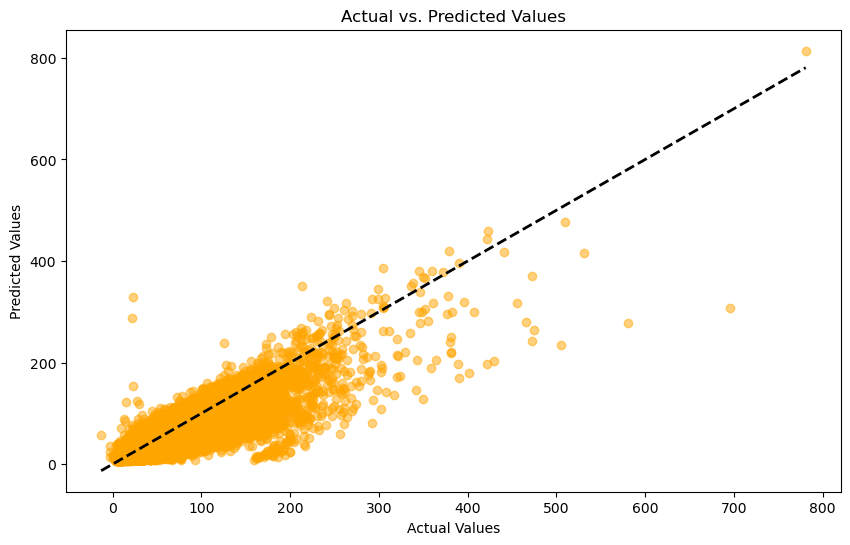

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Ideal line where actual = predicted
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

45000/45000 ━━━━━━━━━━━━━━━━━━━━ 25s 561us/step
Neural Network Model Training Set Metrics:
Mean Absolute Error (MAE): 5.355295642391074
Mean Squared Error (MSE): 103.00402672634917
Root Mean Squared Error (RMSE): 10.149089945721693
R-squared (R^2): 0.7776667404598285


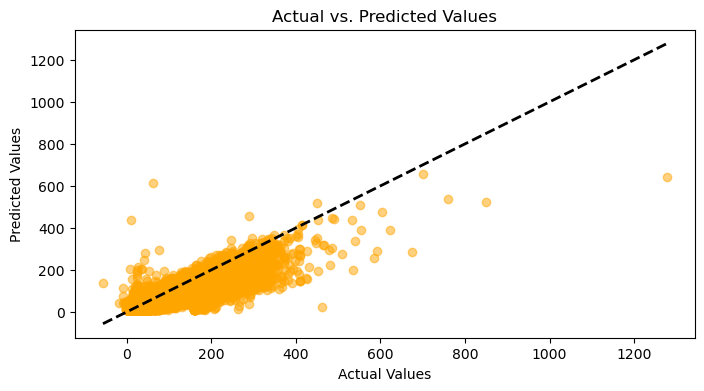

In [64]:
# Predict on the training set
y_train_pred = model.predict(X_train)

# Calculate evaluation metrics for the training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE
train_r2 = r2_score(y_train, y_train_pred)

# Print evaluation metrics for the training set
print("Neural Network Model Training Set Metrics:")
print("Mean Absolute Error (MAE):", train_mae)
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R-squared (R^2):", train_r2)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.scatter(y_train, y_train_pred , alpha=0.5, color='orange')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Ideal line where actual = predicted
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


## Decision Tree Hyperprameter Tuning

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define the parameter distribution
param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 100),
    'min_samples_leaf': np.arange(1, 100),
    'max_features': [None, 'sqrt', 'log2'],
}

# Initialize the decision tree regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Define the scorer based on Mean Squared Error
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Initialize RandomizedSearchCV with a fixed number of iterations
random_search = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_dist, 
                                   n_iter=100, scoring=mse_scorer, cv=5, n_jobs=-1, verbose=1, 
                                   random_state=42)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Find the best model hyperparameters
best_params = random_search.best_params_
print(f"Best parameters found: {best_params}")

# Find the best score from the random search
best_score = random_search.best_score_
print(f"Best score found: {best_score}")

# You can also use the best estimator directly to make predictions
best_decision_tree = random_search.best_estimator_

# Predict on the testing set with the best found parameters
dt_y_pred = best_decision_tree.predict(X_test)

# Calculate evaluation metrics for the testing set
dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_rmse = mean_squared_error(y_test, dt_y_pred, squared=False)
dt_r2 = r2_score(y_test, dt_y_pred)

# Print evaluation metrics for the testing set
print("Decision Tree Regressor Testing Set Metrics with Best Parameters:")
print("Mean Absolute Error (MAE):", dt_mae)
print("Mean Squared Error (MSE):", dt_mse)
print("Root Mean Squared Error (RMSE):", dt_rmse)
print("R-squared (R^2):", dt_r2)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: {'min_samples_split': 54, 'min_samples_leaf': 70, 'max_features': None, 'max_depth': 10}
Best score found: -94.6135551415457
Decision Tree Regressor Testing Set Metrics with Best Parameters:
Mean Absolute Error (MAE): 5.418482563839939
Mean Squared Error (MSE): 93.45198793128407
Root Mean Squared Error (RMSE): 9.66705683914624
R-squared (R^2): 0.7995550759169135


In [66]:
# Using the best parameters from the random search to create a new model
best_decision_tree = DecisionTreeRegressor(
        max_depth=40,
        min_samples_split=48,
        min_samples_leaf=57,
        max_features=None,
        random_state=42
)

# Re-fit the model on the training data
best_decision_tree.fit(X_train, y_train)

# Make predictions with the best model
y_test_pred = best_decision_tree.predict(X_test)

# Calculate and print the performance metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTesting Set Metrics:")
print("Mean Absolute Error (MAE):", test_mae)
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R-squared (R^2):", test_r2)




Testing Set Metrics:
Mean Absolute Error (MAE): 5.467577398215078
Mean Squared Error (MSE): 94.27664979838174
Root Mean Squared Error (RMSE): 9.709616356910388
R-squared (R^2): 0.7977862608386709


In [67]:
# Make predictions with the best model
y_train_pred = best_decision_tree.predict(X_train)

# Calculate and print the performance metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("Training Set Metrics:")
print("Mean Absolute Error (MAE):", train_mae)
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R-squared (R^2):", train_r2)

Training Set Metrics:
Mean Absolute Error (MAE): 5.246341910887092
Mean Squared Error (MSE): 87.35960269398895
Root Mean Squared Error (RMSE): 9.346635902504651
R-squared (R^2): 0.81143508815738


# Model Deployment

In [70]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [79]:
import pickle

# Serialize the trained model to a file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

In [80]:
import pickle

# Load the serialized model from the file
with open('xgb_model.pkl', 'rb') as file:
    PICKLE_model = pickle.load(file)

In [81]:
PICKLE_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

trip miles 4.84
trip time  1359
 dulocation ID 143
pulocation ID 13 
pickup up hour 0
 pickup day 4
trip duration 22.65

features = ["


In [75]:

values = [4.84, 1359, 0, 4]

In [76]:
merged_df.head()

,request_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,...,hvfhs_license_num_HV0005,dispatching_base_num_B03404,dispatching_base_num_B03406,dispatching_base_num_B03430,request_hour,pickup_day_of_week,day_type,is_peak_hour,month,request_month
0,2023-11-30 23:58:32,2023-12-01 00:03:42,2023-12-01 00:26:21,13,143,4.84,1359,43.48,0.00,1.20,...,0,1,0,0,23,Friday,Weekday,0,11,11
1,2023-12-01 00:37:55,2023-12-01 00:44:37,2023-12-01 00:54:01,163,238,2.03,564,22.90,0.00,0.63,...,0,1,0,0,0,Friday,Weekday,0,12,12
2,2023-11-30 23:56:12,2023-12-01 00:12:26,2023-12-01 00:54:03,246,244,7.86,2497,29.74,0.00,0.82,...,0,1,0,0,23,Friday,Weekday,0,11,11
3,2023-12-01 00:05:59,2023-12-01 00:10:30,2023-12-01 00:39:52,231,245,14.35,1762,35.56,20.82,1.55,...,0,1,0,0,0,Friday,Weekday,0,12,12
4,2023-12-01 00:16:09,2023-12-01 00:22:08,2023-12-01 01:02:56,231,265,26.09,2448,91.23,0.00,2.51,...,0,1,0,0,0,Friday,Weekday,0,12,12


In [82]:
import pandas as pd

# Define feature names and corresponding values
data = {
    'trip_miles': 2.03,
    'trip_time': 564,
    'pickup_hour': 0,
    'pickup_day': 4
}

# Create a DataFrame
input_data = pd.DataFrame([data])

# Display the DataFrame to verify
print(input_data)


   trip_miles  trip_time  pickup_hour  pickup_day
0        2.03        564            0           4


In [83]:
PICKLE_model.predict(input_data)

array([12.815224], dtype=float32)